In [2]:
import pandas as pd
import sys
sys.path.append('..')
from functions.pipeline import *

In [32]:
file_list = ["pos_0100.csv","pos_0500.csv","pos_1000.csv","neg_and_pos_0101.csv","pos_and_neg_0501.csv","pos_and_neg_0503.csv","pos_1003.csv","pos_1005.csv","neg_pos_mixed.csv"]
path = "../ACDC/results"
df_list = []
for file in file_list:
    df = pd.read_csv(os.path.join(path,file))
    df_list.append(df)

In [6]:
def get_class_list(class_num,ground_truth):
    array1 = np.any(ground_truth == class_num, axis = 1)
    array2 = np.any(array1 == True, axis = 1)
    class_indices = np.where(array2 == True)
    indices = list(class_indices[0])
    return indices

In [7]:
ground_truth = gzip_file("../ACDC/ground_truth.npy.gz","r")
class_indices = {}
for c in [1,2,3]:
    class_indices[c] = get_class_list(c,ground_truth)

In [10]:
df_list[3].head()

,image_id,f_points_class_1,f_points_class_2,f_points_class_3,b_points_class_1,b_points_class_2,b_points_class_3,dice_class_1,dice_class_2,dice_class_3,IOU_class_1,IOU_class_2,IOU_class_3,accuracy_class_1,accuracy_class_2,accuracy_class_3
0,0,5,5,5,1,1,1,0.882,0.783,0.928,0.789,0.644,0.866,0.992,0.993,0.996
1,0,5,5,5,1,1,1,0.929,0.668,0.954,0.868,0.502,0.912,0.996,0.991,0.998
2,0,5,5,5,1,1,1,0.941,0.774,0.934,0.888,0.632,0.876,0.996,0.992,0.997
3,0,5,5,5,1,1,1,0.912,0.660,0.932,0.839,0.492,0.872,0.995,0.990,0.997
4,0,5,5,5,1,1,1,0.935,0.811,0.966,0.879,0.682,0.934,0.996,0.994,0.998


In [35]:
def result_class(class_num:int,df_list:list,indices:list):
    c = class_num
    dct = {"image_id":indices}
    for i in range(1,10):
        dct[f"mean_dice_{i}"] = []
        dct[f"mean_iou_{i}"] = []
        dct[f"mean_accuracy_{i}"] = []
        dct[f"std_dice_{i}"] = []
        dct[f"std_iou_{i}"] = []
        dct[f"std_accuracy_{i}"] = []
    for i,df in enumerate(df_list):
        for idx in indices:
            t = df[df.image_id == idx][[f"dice_class_{c}",f"IOU_class_{c}",f"accuracy_class_{c}"]]
            mean_scores = t.mean().to_list()
            dct[f"mean_dice_{i+1}"].append(mean_scores[0])
            dct[f"mean_iou_{i+1}"].append(mean_scores[1])
            dct[f"mean_accuracy_{i+1}"].append(mean_scores[2])

            std_scores = t.std().to_list()
            dct[f"std_dice_{i+1}"].append(std_scores[0])
            dct[f"std_iou_{i+1}"].append(std_scores[1])
            dct[f"std_accuracy_{i+1}"].append(std_scores[2])
    
    result_df = pd.DataFrame(dct)
    return result_df

In [6]:
2841 in class_indices[3]

False

In [12]:
t = df[df.image_id == 0]

In [16]:
t.mean().to_list()

[0.0,
 10.0,
 10.0,
 10.0,
 5.0,
 5.0,
 5.0,
 0.9442999999999999,
 0.7846199999999999,
 0.9494799999999999,
 0.8947000000000002,
 0.6480799999999999,
 0.9041400000000002,
 0.9965999999999999,
 0.99346,
 0.99736]

In [36]:
class_1 = result_class(1,df_list,class_indices[1])
class_2 = result_class(2,df_list,class_indices[2])
class_3 = result_class(3,df_list,class_indices[3])

In [37]:
class_1.head()

,image_id,mean_dice_1,mean_iou_1,mean_accuracy_1,std_dice_1,std_iou_1,std_accuracy_1,mean_dice_2,mean_iou_2,mean_accuracy_2,...,mean_accuracy_8,std_dice_8,std_iou_8,std_accuracy_8,mean_dice_9,mean_iou_9,mean_accuracy_9,std_dice_9,std_iou_9,std_accuracy_9
0,0,0.81394,0.68932,0.98702,0.051408,0.070274,0.004706,0.70424,0.58450,0.98586,...,0.99660,0.012735,0.022629,0.000881,0.88318,0.79428,0.99274,0.053375,0.078582,0.003129
1,1,0.54924,0.42570,0.93230,0.265393,0.263662,0.063000,0.86972,0.77384,0.99272,...,0.99710,0.010246,0.018373,0.000647,0.91392,0.84400,0.99518,0.040710,0.065426,0.002488
2,2,0.53566,0.37524,0.96370,0.123331,0.113893,0.020428,0.70108,0.56498,0.98830,...,0.99390,0.028206,0.043592,0.001488,0.68898,0.56070,0.98920,0.223781,0.212887,0.004651
3,3,0.17468,0.11528,0.68836,0.216670,0.169757,0.262725,0.55382,0.38406,0.97814,...,0.99530,0.030457,0.045636,0.001165,0.47618,0.31732,0.96790,0.093260,0.080741,0.022027
4,4,0.46246,0.31850,0.96304,0.183062,0.154451,0.044799,0.64538,0.48212,0.98858,...,0.99734,0.018703,0.030342,0.000593,0.58626,0.41884,0.98556,0.086058,0.070346,0.002533


In [38]:
class_2.head()

,image_id,mean_dice_1,mean_iou_1,mean_accuracy_1,std_dice_1,std_iou_1,std_accuracy_1,mean_dice_2,mean_iou_2,mean_accuracy_2,...,mean_accuracy_8,std_dice_8,std_iou_8,std_accuracy_8,mean_dice_9,mean_iou_9,mean_accuracy_9,std_dice_9,std_iou_9,std_accuracy_9
0,0,0.41948,0.26774,0.96604,0.074327,0.051560,0.004798,0.59722,0.43904,0.97892,...,0.99346,0.049079,0.062884,0.001216,0.69874,0.54246,0.98864,0.079423,0.090130,0.004085
1,1,0.18788,0.10922,0.86760,0.120388,0.084251,0.072451,0.72682,0.57636,0.98704,...,0.99282,0.042325,0.057102,0.001240,0.72822,0.58212,0.98802,0.103432,0.118726,0.006870
2,2,0.09420,0.05390,0.91974,0.119181,0.074865,0.049749,0.41058,0.26094,0.96124,...,0.99062,0.062268,0.075187,0.001652,0.49526,0.33662,0.96946,0.112959,0.102049,0.012523
3,3,0.01590,0.00814,0.66338,0.018748,0.009602,0.270822,0.45018,0.29456,0.97938,...,0.99006,0.054111,0.061915,0.001168,0.49586,0.33848,0.98046,0.125488,0.108086,0.015487
4,4,0.22820,0.14214,0.83358,0.182991,0.133184,0.191005,0.66168,0.49924,0.98622,...,0.99182,0.053662,0.065199,0.001335,0.71334,0.56526,0.99042,0.116969,0.122891,0.005143


In [39]:
class_3.head()

,image_id,mean_dice_1,mean_iou_1,mean_accuracy_1,std_dice_1,std_iou_1,std_accuracy_1,mean_dice_2,mean_iou_2,mean_accuracy_2,...,mean_accuracy_8,std_dice_8,std_iou_8,std_accuracy_8,mean_dice_9,mean_iou_9,mean_accuracy_9,std_dice_9,std_iou_9,std_accuracy_9
0,0,0.07702,0.06024,0.97464,0.220973,0.180673,0.004894,0.84400,0.74244,0.99316,...,0.99736,0.015595,0.027127,0.000776,0.87938,0.79504,0.99454,0.090765,0.129387,0.003471
1,1,0.95918,0.92650,0.99810,0.060170,0.086672,0.002460,0.87946,0.79970,0.99434,...,0.99874,0.004673,0.008951,0.000443,0.86300,0.79824,0.99436,0.202288,0.229334,0.006543
2,2,0.82828,0.77820,0.99260,0.293583,0.292010,0.009783,0.12416,0.08628,0.97150,...,0.99746,0.012208,0.022105,0.000734,0.42404,0.36560,0.98026,0.407988,0.383420,0.011949
3,3,0.56174,0.47244,0.98408,0.363271,0.332522,0.009998,0.85222,0.74990,0.99250,...,0.99776,0.009001,0.016473,0.000555,0.75332,0.67696,0.99026,0.303045,0.307694,0.009234
4,4,0.94880,0.90818,0.99758,0.061367,0.096130,0.002556,0.87568,0.78744,0.99428,...,0.99824,0.013426,0.024356,0.000870,0.91208,0.86290,0.99622,0.156913,0.177180,0.004661


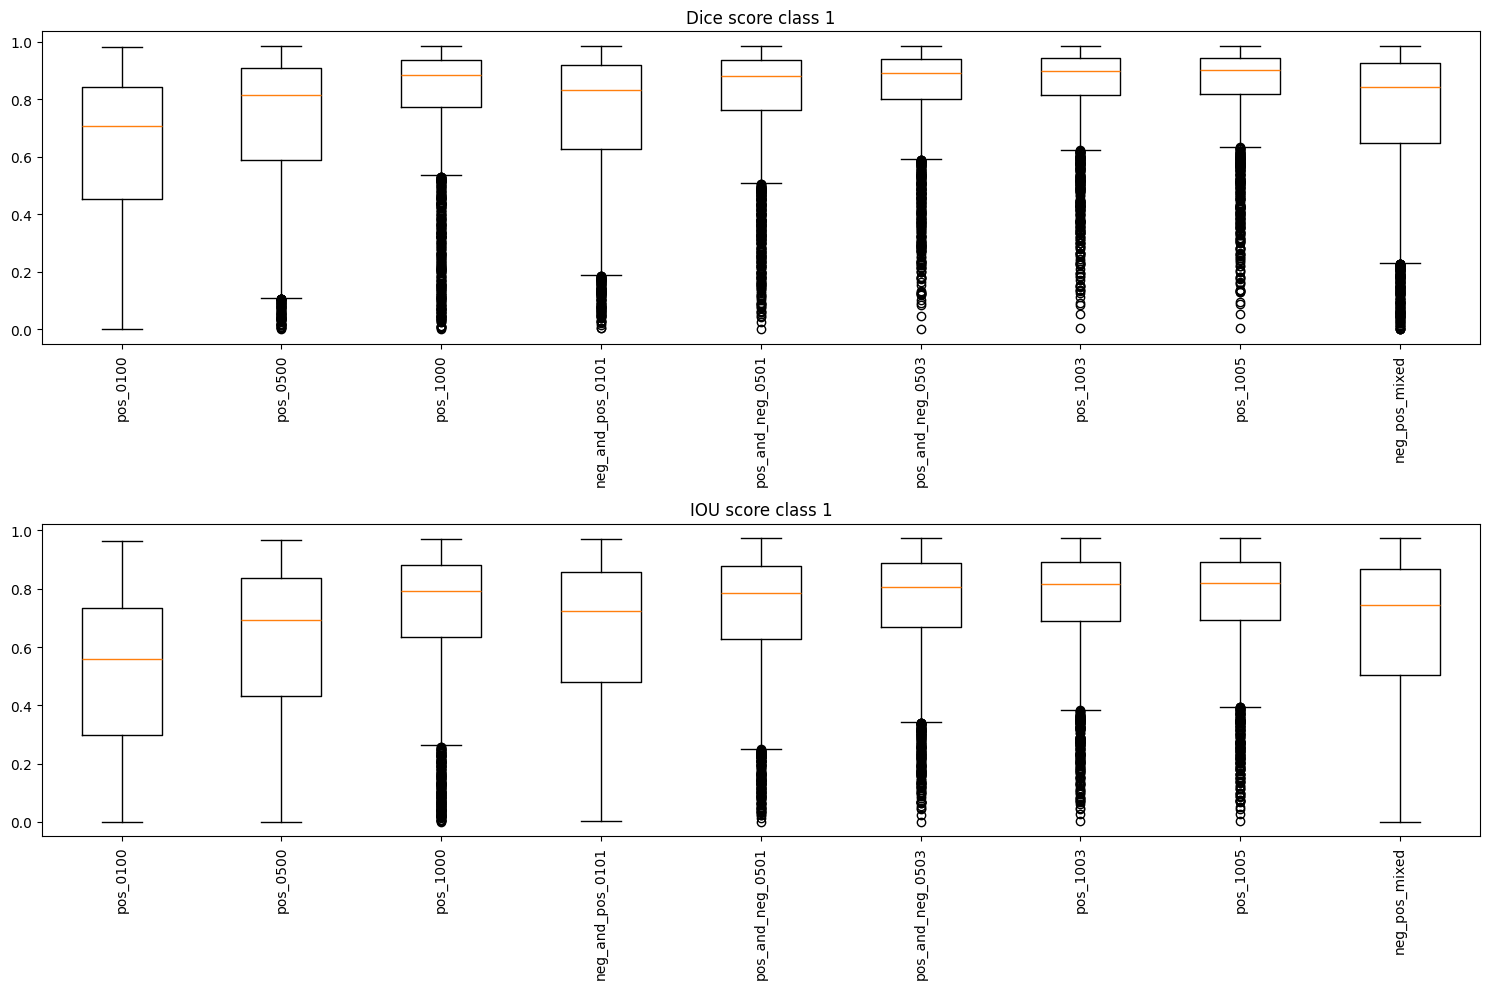

In [79]:
fig, ax = plt.subplots(2,1,figsize = (15,10))
ax[0].boxplot([class_1[f"mean_dice_{i+1}"] for i in range(9)])
ax[0].set_xticklabels([label.replace(".csv","") for label in file_list], rotation = 90)
ax[0].set_title("Dice score class 1")
ax[1].boxplot([class_1[f"mean_iou_{i+1}"] for i in range(9)])
ax[1].set_xticklabels([label.replace(".csv","") for label in file_list], rotation = 90)
ax[1].set_title("IOU score class 1")
fig.tight_layout()

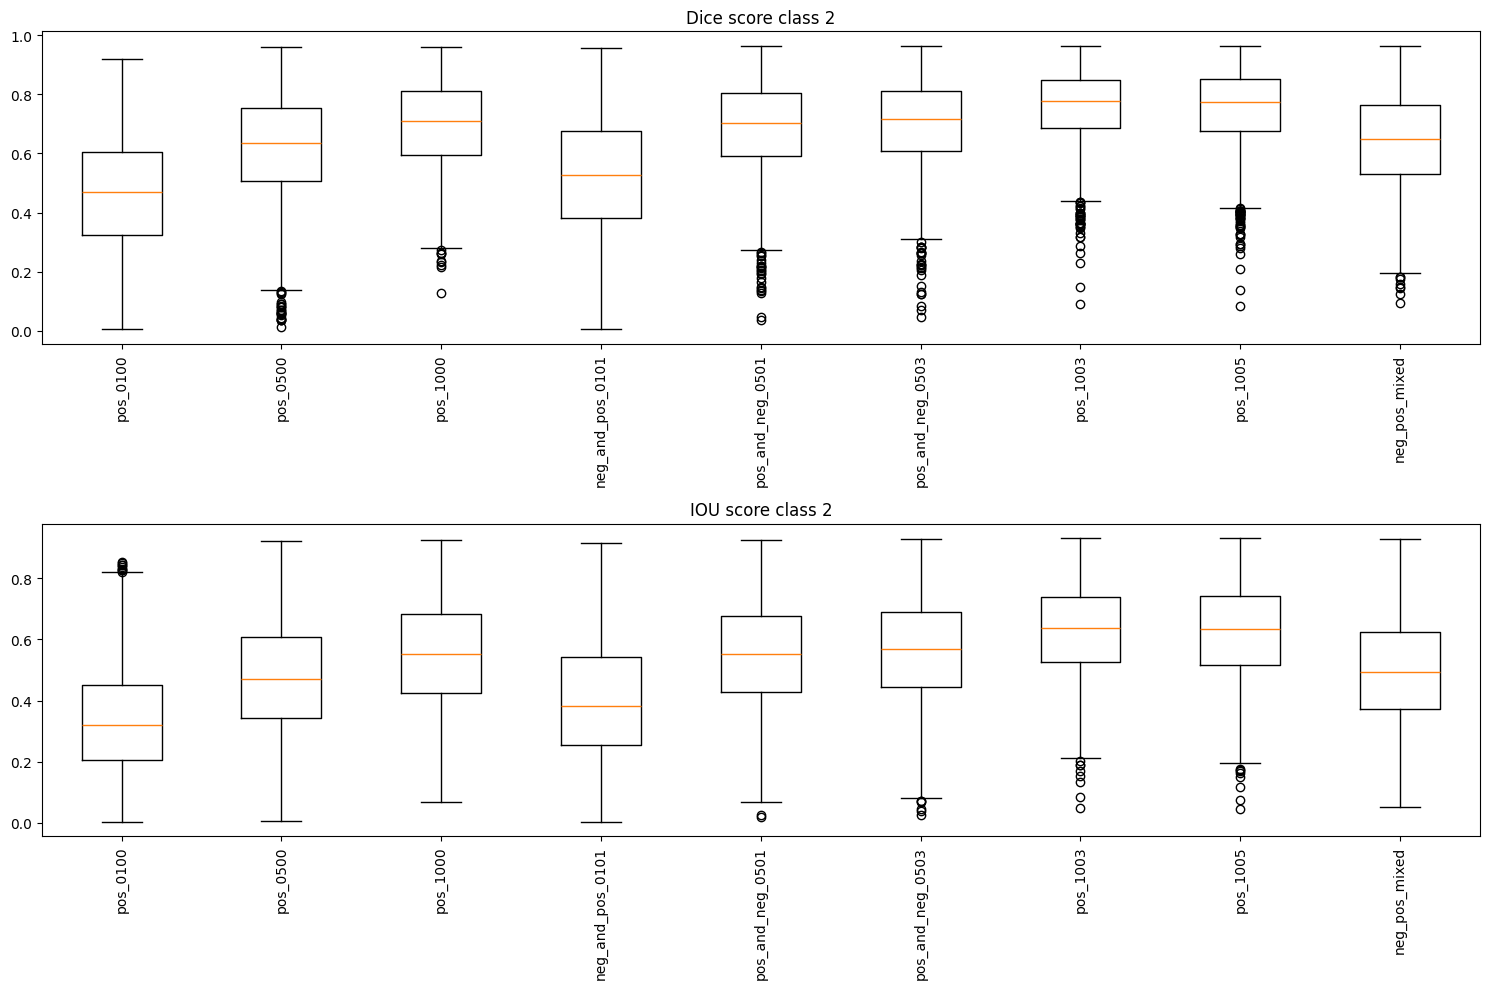

In [80]:
fig, ax = plt.subplots(2,1,figsize = (15,10))
ax[0].boxplot([class_2[f"mean_dice_{i+1}"] for i in range(9)])
ax[0].set_xticklabels([label.replace(".csv","") for label in file_list], rotation = 90)
ax[0].set_title("Dice score class 2")
ax[1].boxplot([class_2[f"mean_iou_{i+1}"] for i in range(9)])
ax[1].set_xticklabels([label.replace(".csv","") for label in file_list], rotation = 90)
ax[1].set_title("IOU score class 2")
fig.tight_layout()

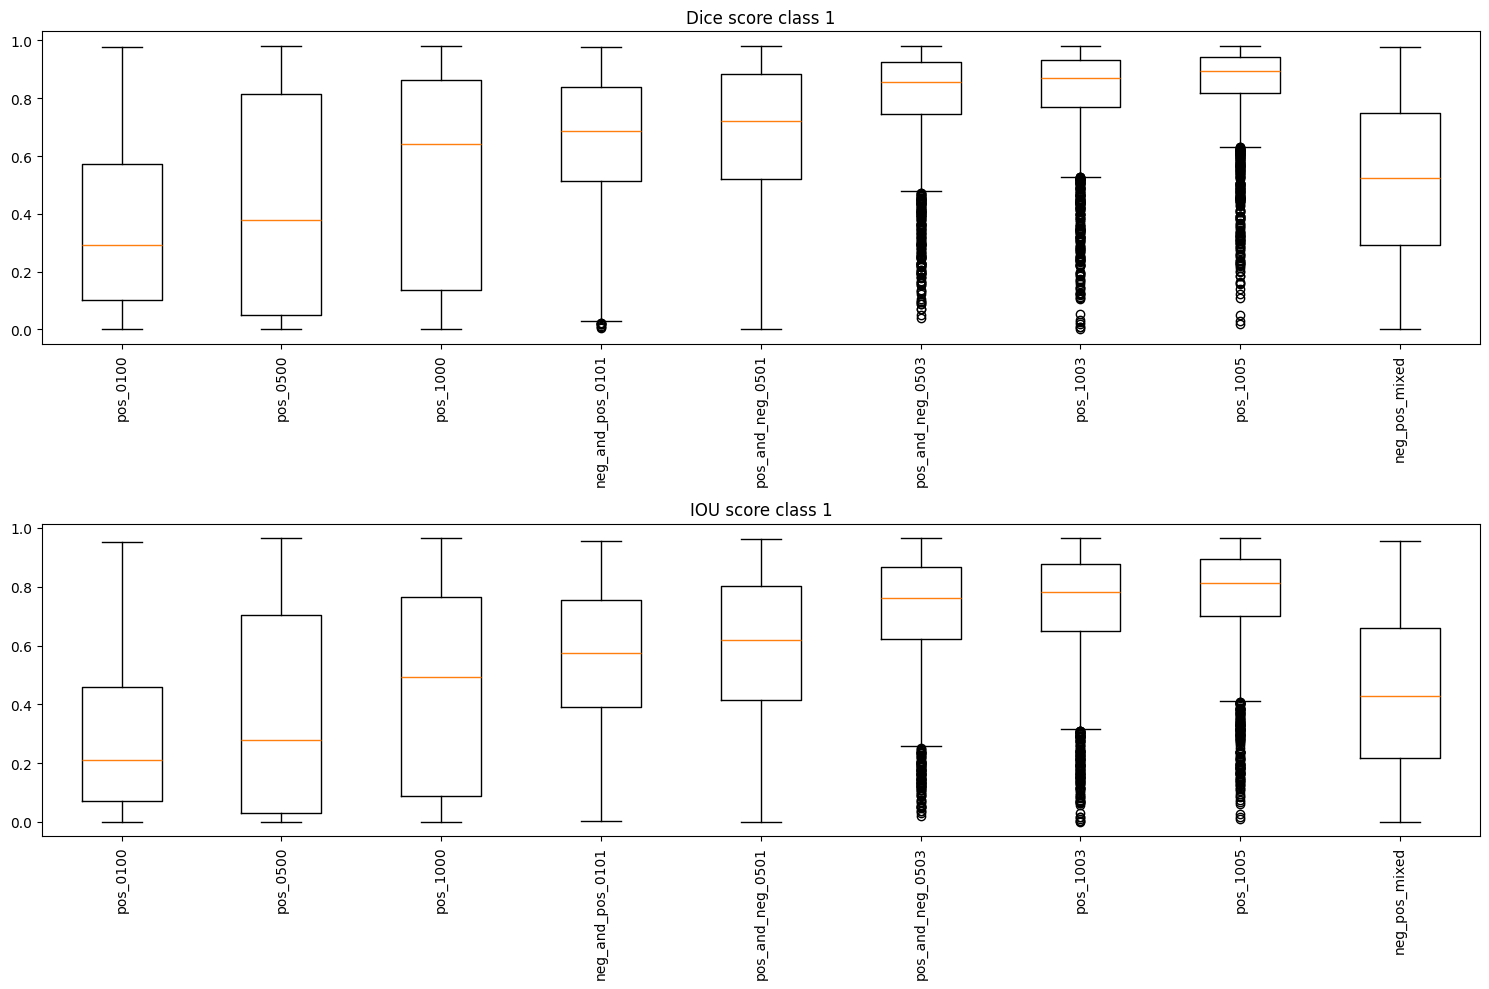

In [81]:
fig, ax = plt.subplots(2,1,figsize = (15,10))
colors = ["red","green","blue","yellow","black","purple","brown","violet","orange"]
ax[0].boxplot([class_3[f"mean_dice_{i+1}"] for i in range(9)])
ax[0].set_xticklabels([label.replace(".csv","") for label in file_list], rotation = 90)
ax[0].set_title("Dice score class 1")
ax[1].boxplot([class_3[f"mean_iou_{i+1}"] for i in range(9)])
ax[1].set_xticklabels([label.replace(".csv","") for label in file_list], rotation = 90)
ax[1].set_title("IOU score class 1")
fig.tight_layout()